In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
# Bring in .csv created to isolate natural disasters that resulted in fatalities
df = pd.read_csv('fatal_events.csv')
df.head(5)

,event_category,event_group,event_subgroup,event_type,place,event_start_date,comments,fatalities,injured_/_infected,evacuated,...,federal_dfaa_payments,provincial_dfaa_payments,provincial_department_payments,municipal_costs,ogd_costs,insurance_payments,ngo_payments,utility_-_people_affected,magnitude,unnamed:_22
0,Disaster,Natural,Meteorological - Hydrological,Flood,Saint John River Basin NB,3/1/1902 12:00:00 AM,"Saint John River Basin NB, March 1902. An unus...",2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,Disaster,Natural,Geological,Landslide,Frank AB,4/29/1903 12:00:00 AM,"Frank AB, April 29, 1903. 70 dead; 60 million ...",70.0,23.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,Disaster,Natural,Geological,Landslide,Spences Bridge BC,8/13/1905 12:00:00 AM,"Spences Bridge BC, August 13, 1905. A large gr...",15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,Disaster,Natural,Geological,Landslide,Notre-Dame-de-la-Salette QC,4/26/1908 12:00:00 AM,"Notre-Dame-de-la-Salette QC, April 26, 1908. 3...",33.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,Disaster,Natural,Meteorological - Hydrological,Flood,Chester NB,1/4/1909 12:00:00 AM,"Chester NB, January 4, 1909. Mild weather caus...",1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [3]:
# New list of fatal events comments for easy readibifatal_eventslity
# Convert the "comments" column to a list and print each comment with enumeration for easy reference
fatal_events_comments_list = df['comments'].tolist()
for i, comment in enumerate(fatal_events_comments_list):
    print(comment)
    print(f"Index {i}:")
    print()

Saint John River Basin NB, March 1902. An unusually early break-up and downstream movement of ice cover on the Saint John River resulted from heavy rains, warm temperatures, and raised water levels. A total of 15 ice jams resulted from the raised water levels, causing extensive damage, including washouts of bridges, roads and railways. The lumber industry was also affected, where damage to mills and loss of stock were reported.
Index 0:

Frank AB, April 29, 1903. 70 dead; 60 million tonnes of limestone came crashing down Turtle Mountain on to the small mining town of Frank; the landslide buried part of the town, covering roads, railways and homes; the Old Man River and the CP Rail Tracks were buried under 30 metres of rock.
Index 1:

Spences Bridge BC, August 13, 1905. A large gravel bank broke away from a mountain side and came crashing down on a First Nation reserve destroying homes and the local church; 15 dead; the landslide into the Thompson River caused a wave which swept victims

In [4]:
len(df)

246

### places where the fayal events happened

In [5]:
# COnvert all charactes in place to be lowercase
df['place'] = df['place'].str.lower()

In [6]:
# look at all unique entries on "place"
df.loc[:, 'place'].unique()

array(['saint john river basin nb', 'frank ab', 'spences bridge bc',
       'notre-dame-de-la-salette qc', 'chester nb',
       'burnaby and new westminster bc', 'rogers pass bc',
       'st-alphonse-de-bagotville qc', 'coucoucache qc', 'cochrane on',
       'regina sk', 'eastern canada', 'lakes huron, erie and ontario',
       'newfoundland coast', 'labrador', 'cooper mine, jane camp bc',
       'cochrane and matheson on', 'across canada',
       'southeastern saskatchewan', 'saskatchewan and alberta',
       'winnipeg mb', 'montreal qc', 'edmonton ab',
       'ontario and manitoba', 'yukon to ontario', 'nova scotia',
       'gulf of st. lawrence qc', 'british columbia to ontario',
       'banff ab', 'western alberta', 'northumberland strait (ns and pe)',
       'joe rich and southern british columbia', 'madeleine islands qc',
       'bugaboo glacier provincial park bc', 'southern new brunswick',
       'montreal and area qc', 'blanc sablon qc', 'southern ontario',
       'ontario, qu

### They need to be reduced, so starting with grouping by province where the event took place. Creating a new column called province

In [7]:

    mapping_dict = {
    'alberta': 'ab',
    'ab': 'ab',    
    'british columbia': 'bc',
    'vancouver island': 'bc',
    'bc': 'bc',
    'manitoba': 'mb',
    'mb': 'mb',
    'new brunswick': 'nb',
    'nb': 'nb',
    'newfoundland and labrador': 'nl',
    'newfoundland': 'nl',
    'nl': 'nl',
    'nova scotia': 'ns',
    'ns': 'ns',
    'northwest territories': 'nt',
    'nt': 'nt',
    'ontario': 'on',
    'on': 'on',
    'quebec': 'qc',
    'québec': 'qc',
    'qc': 'qc',
    'saskatchewan': 'sk',
    'sk': 'sk',
    'yukon': 'yt',
    'yt': 'yt',
    'pe': 'pe',
    'nu': 'nu',
    'prince edward island': 'pe'
    
}
    
    
df['province'] = df['place'].apply(lambda x: next((val for key, val in mapping_dict.items() if key in x.lower()), None))

In [8]:
df.head(3)

,event_category,event_group,event_subgroup,event_type,place,event_start_date,comments,fatalities,injured_/_infected,evacuated,...,provincial_dfaa_payments,provincial_department_payments,municipal_costs,ogd_costs,insurance_payments,ngo_payments,utility_-_people_affected,magnitude,unnamed:_22,province
0,Disaster,Natural,Meteorological - Hydrological,Flood,saint john river basin nb,3/1/1902 12:00:00 AM,"Saint John River Basin NB, March 1902. An unus...",2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,nb
1,Disaster,Natural,Geological,Landslide,frank ab,4/29/1903 12:00:00 AM,"Frank AB, April 29, 1903. 70 dead; 60 million ...",70.0,23.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,ab
2,Disaster,Natural,Geological,Landslide,spences bridge bc,8/13/1905 12:00:00 AM,"Spences Bridge BC, August 13, 1905. A large gr...",15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,bc


In [9]:
# create a new df to look at places not mapping to a province
prov_map_df = df[df['province'].isnull()]
prov_map_df.head(5)


,event_category,event_group,event_subgroup,event_type,place,event_start_date,comments,fatalities,injured_/_infected,evacuated,...,provincial_dfaa_payments,provincial_department_payments,municipal_costs,ogd_costs,insurance_payments,ngo_payments,utility_-_people_affected,magnitude,unnamed:_22,province
11,Disaster,Natural,Meteorological - Hydrological,Heat Event,eastern canada,7/8/1912 12:00:00 AM,"Eastern Canada, July 8-10, 1912. Temperatures ...",3.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,None
17,Disaster,Natural,Biological,Epidemic,across canada,1/1/1918 12:00:00 AM,"Across Canada, 1918-1925. More than 50,000 dea...",50000.0,2000000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,None
35,Disaster,Natural,Meteorological - Hydrological,Winter Storm,eastern canada,3/15/1993 12:00:00 AM,"Eastern Canada off Cape Sable Island NS, March...",33.0,0.0,0.0,...,NaN,NaN,NaN,NaN,19866000.0,NaN,0.0,0.0,NaN,None
51,Disaster,Natural,Meteorological - Hydrological,Avalanche,western canada,1/21/2003 12:00:00 AM,"Golden, Fernie, Valemount, Nelson, Revelstoke,...",30.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,None
56,Disaster,Natural,Geological,Tsunami,east indian ocean,12/26/2004 12:00:00 AM,"East Indian Ocean, December 26, 2004. A power...",20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,None


In [10]:
len(prov_map_df)

22

In [11]:
# Looking at places not mapping
# look at all unique entries on "place"
prov_map_df.loc[:, 'place'].unique()

array(['eastern canada', 'across canada', 'western canada',
       'east indian ocean', 'port-au-prince, haiti', 'st. lawrence river',
       'prairie provinces', 'canada', 'maritime provinces',
       'southern prairies', 'japan', 'nepal'], dtype=object)

### With 22 not mapping, a decision would need to made on how to best map those incidents. For now they are being dropped in the next cell

In [12]:
#dropping places that do not map to a province
df = df[df['province'].notna()]
df.head(1)

,event_category,event_group,event_subgroup,event_type,place,event_start_date,comments,fatalities,injured_/_infected,evacuated,...,provincial_dfaa_payments,provincial_department_payments,municipal_costs,ogd_costs,insurance_payments,ngo_payments,utility_-_people_affected,magnitude,unnamed:_22,province
0,Disaster,Natural,Meteorological - Hydrological,Flood,saint john river basin nb,3/1/1902 12:00:00 AM,"Saint John River Basin NB, March 1902. An unus...",2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,nb


In [13]:
len(df)

224

In [14]:
# Check for nulls in 'event_type'
df.loc[df['event_type'].isna()]

,event_category,event_group,event_subgroup,event_type,place,event_start_date,comments,fatalities,injured_/_infected,evacuated,...,provincial_dfaa_payments,provincial_department_payments,municipal_costs,ogd_costs,insurance_payments,ngo_payments,utility_-_people_affected,magnitude,unnamed:_22,province


In [15]:
# What event_type entries are associated with fatalities?
df['event_type'].value_counts()

Flood                                   40
Epidemic                                34
Landslide                               31
Winter Storm                            24
Tornado                                 20
Storms and Severe Thunderstorms         17
Avalanche                               16
Hurricane / Typhoon / Tropical Storm    14
Wildfire                                10
Storm - Unspecified / Other              7
Heat Event                               5
Cold Event                               3
Earthquake                               2
Tsunami                                  1
Name: event_type, dtype: int64

In [16]:
print(df.columns)

Index(['event_category', 'event_group', 'event_subgroup', 'event_type',
       'place', 'event_start_date', 'comments', 'fatalities',
       'injured_/_infected', 'evacuated', 'estimated_total_cost',
       'normalized_total_cost', 'event_end_date', 'federal_dfaa_payments',
       'provincial_dfaa_payments', 'provincial_department_payments',
       'municipal_costs', 'ogd_costs', 'insurance_payments', 'ngo_payments',
       'utility_-_people_affected', 'magnitude', 'unnamed:_22', 'province'],
      dtype='object')


In [17]:
import altair as alt

# Enable JSON-based data transformation
alt.data_transformers.enable('json')

# Define the scatter plot using your full dataset
scatter = alt.Chart(df).mark_circle().encode(
    x=alt.X('event_start_date:T', title='Date'),
    y=alt.Y('fatalities:Q', title='Fatalities'),
    color=alt.Color('event_type:N', title='Event Type', scale=alt.Scale(scheme='category10')),
    tooltip=['event_start_date:T', 'event_type:N', 'fatalities:Q', 'province:N']
).properties(width=800, height=400)

scatter

alt.Chart(...)

,event_type,fatalities,province
0,Flood,2.0,nb
1,Landslide,70.0,ab
2,Landslide,15.0,bc
3,Landslide,33.0,qc
4,Flood,1.0,nb


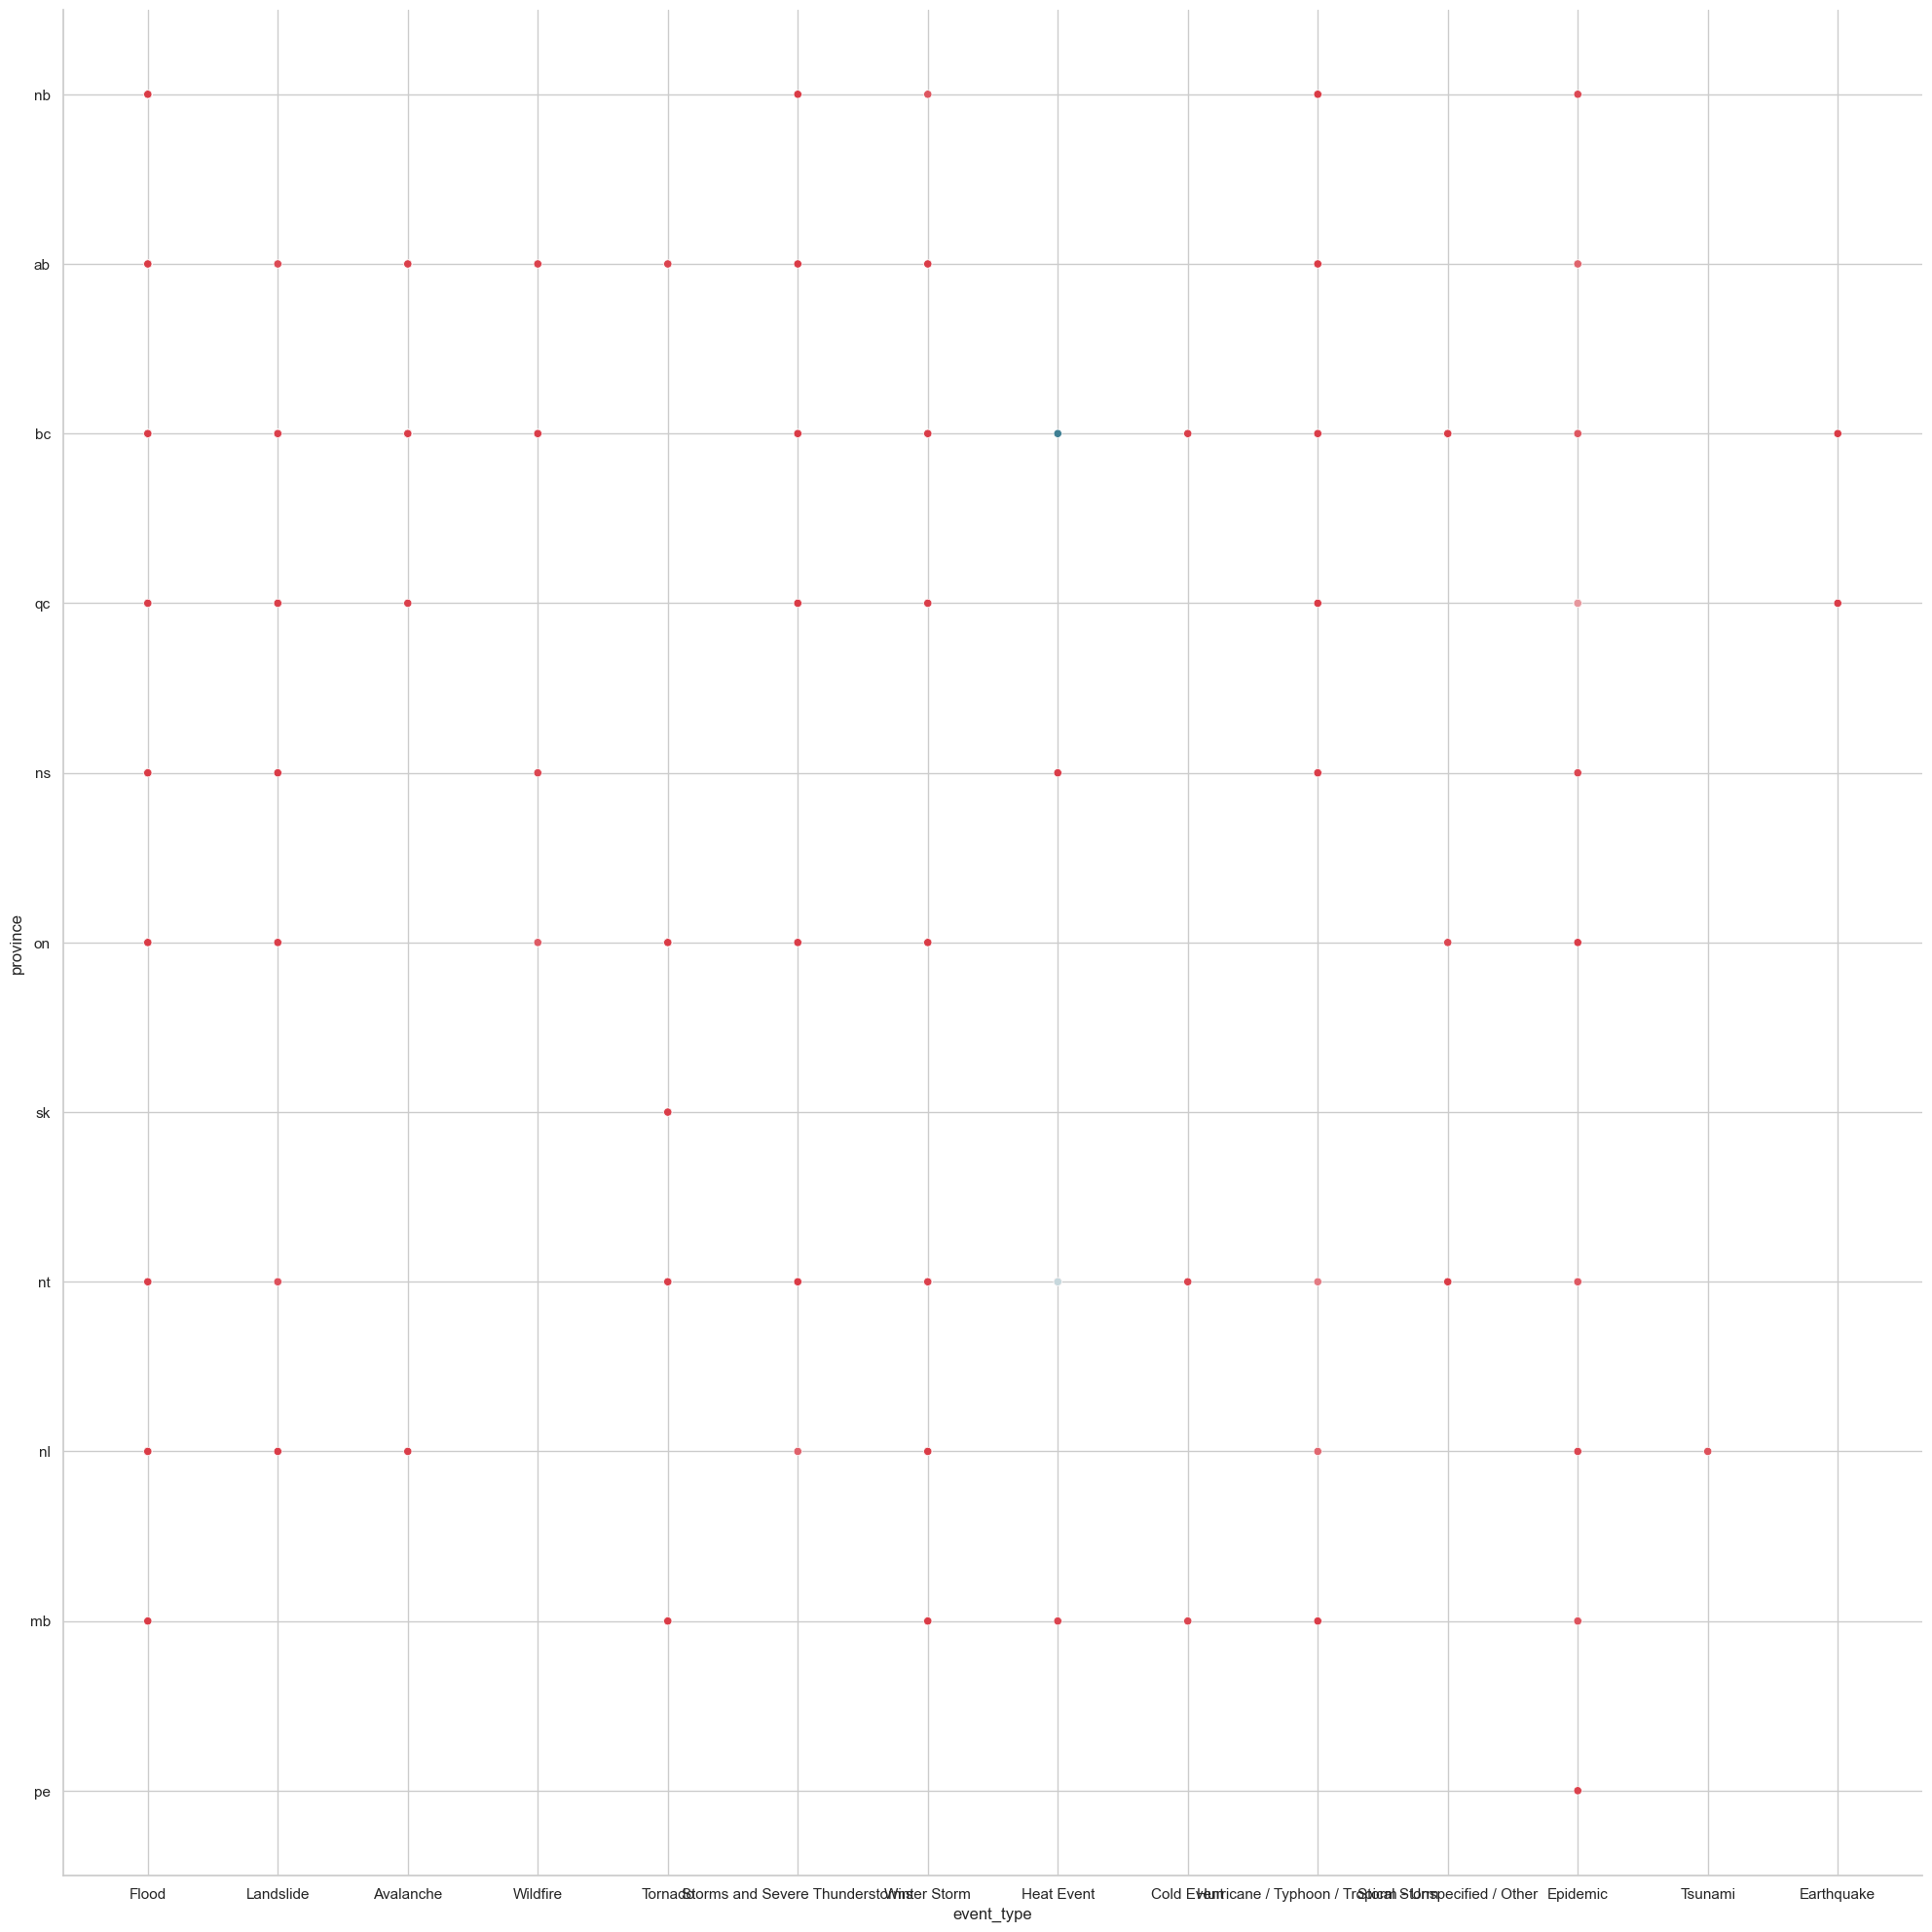

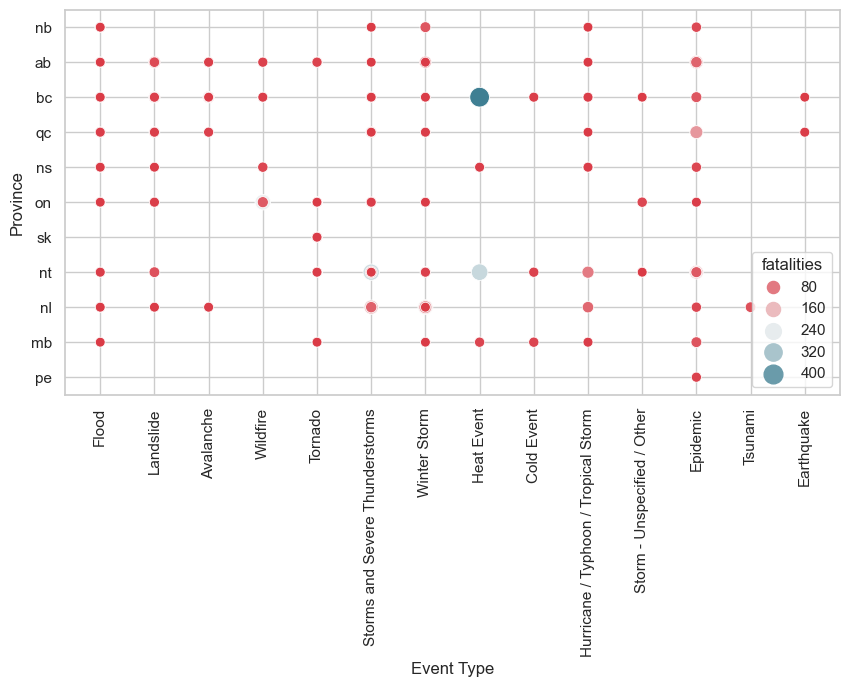

In [40]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Create scatter plot
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=df['event_type'], y=df['province'], hue=df['fatalities'], size=df['fatalities'],
                sizes=(50, 200), palette=cmap, legend=True, ax=ax)

# Set x and y axis labels
ax.set_xlabel('Event Type')
ax.set_ylabel('Province')
# Rotate y-axis labels by 90 degrees
ax.xaxis.set_tick_params(rotation=90)

# Show plot
plt.show()